In [4]:
import scanpy as sc
import scvelo as scv

In [5]:
adata = sc.read_h5ad('/home/lgolinelli/git/lineageVI/outputs_20250721_190752/adata_with_velocity.h5ad')

In [6]:
adata.layers['velocity'] *=-1
adata.obsm['velocity_gp'] *=-1

computing velocity graph (using 1/64 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


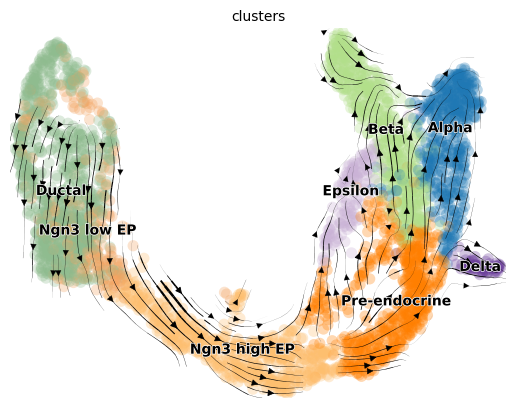

In [7]:
sc.pp.neighbors(adata)
scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata, color='clusters')

computing velocity graph (using 1/64 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


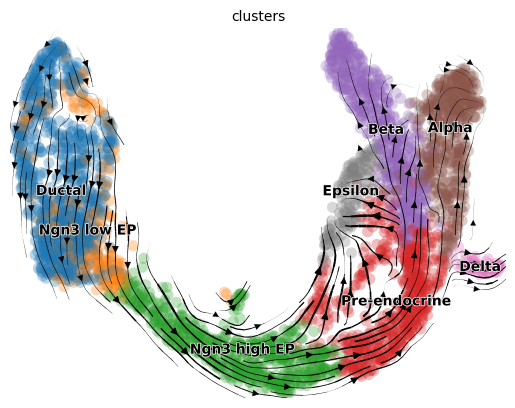

In [8]:
adata_gp = sc.AnnData(X=adata.obsm['z'])

adata_gp.obs = adata.obs.copy()
adata_gp.var_names = adata.uns['terms']
adata_gp.layers['velocity'] = adata.obsm['velocity_gp']
adata_gp.layers['spliced'] = adata.obsm['z']
adata_gp.obsm['X_umap'] = adata.obsm['X_umap']

sc.pp.neighbors(adata_gp)
scv.tl.velocity_graph(adata_gp)
scv.pl.velocity_embedding_stream(adata_gp, color='clusters')

computing velocity graph (using 1/64 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


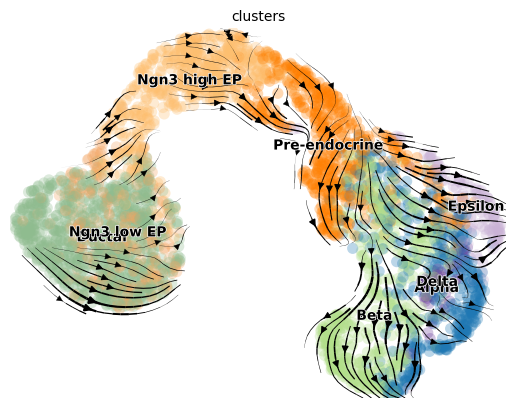

In [9]:
sc.pp.neighbors(adata, use_rep='z')
sc.tl.umap(adata)
scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata, color='clusters')

computing velocity graph (using 1/64 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


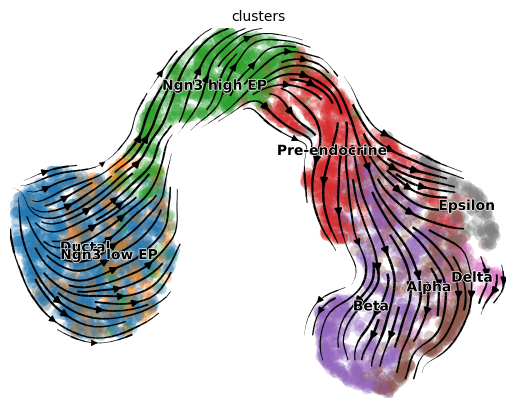

In [10]:
sc.pp.neighbors(adata_gp)
sc.tl.umap(adata_gp)
scv.tl.velocity_graph(adata_gp)
scv.pl.velocity_embedding_stream(adata_gp, color='clusters')